In [147]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the raw dataset and incremental data set

In [148]:
raw_data = pd.read_csv('raw_data.csv')
incremental_data = pd.read_csv('incremental_data.csv')

In [149]:
#print duplicate rows in raw_data
duplicate_rows_raw = raw_data[raw_data.duplicated()]
#print duplicate rows in incremental_data
duplicate_rows_incremental = incremental_data[incremental_data.duplicated()]
# Display duplicate rows
print("Duplicate rows in raw_data:")
print(duplicate_rows_raw)
print("Duplicate rows in incremental_data:")
print(duplicate_rows_incremental)



Duplicate rows in raw_data:
   order_id customer_name product  quantity  unit_price  order_date region
5         4           Eve  Laptop       2.0       750.0  2024-01-07   West
Duplicate rows in incremental_data:
Empty DataFrame
Columns: [order_id, customer_name, product, quantity, unit_price, order_date, region]
Index: []


In [ ]:
# Cleaning
raw_data.drop_duplicates(inplace=True)
incremental_data.drop_duplicates(inplace=True)


- checking data frame after dropping duplicates

In [179]:
#print duplicate rows in raw_data
duplicate_rows_nraw = raw_data[raw_data.duplicated()]
#print duplicate rows in incremental_data
duplicate_rows_nincremental = incremental_data[incremental_data.duplicated()]
# Display duplicate rows
print("Duplicate rows in raw_data:")
print(duplicate_rows_nraw)
print("Duplicate rows in incremental_data:")
print(duplicate_rows_nincremental)

Duplicate rows in raw_data:
Empty DataFrame
Columns: [order_id, customer_name, product, quantity, unit_price, order_date, region, total_price, order_month, customer_tier]
Index: []
Duplicate rows in incremental_data:
Empty DataFrame
Columns: [order_id, customer_name, product, quantity, unit_price, order_date, region, total_price, order_month, customer_tier]
Index: []


## Handling missing values

In [151]:
print(raw_data.isnull().sum())
print(incremental_data.isnull().sum())

order_id          0
customer_name     1
product           0
quantity         26
unit_price       35
order_date        1
region           25
dtype: int64
order_id         0
customer_name    6
product          0
quantity         4
unit_price       0
order_date       0
region           2
dtype: int64


- filling missing values of unit price and quantity with the mean because this is the most appropriate for this data type

In [152]:
raw_data['unit_price'].fillna(raw_data['unit_price'].mean(), inplace=True)
incremental_data['unit_price'].fillna(incremental_data['unit_price'].mean(), inplace=True)



In [153]:
#filling missing values of quantity with the mean
raw_data['quantity'].fillna(raw_data['quantity'].mean(), inplace=True)
incremental_data['quantity'].fillna(incremental_data['quantity'].mean(), inplace=True)

In [154]:
#filling missing values in the region column with the mode
raw_data['region'].fillna(raw_data['region'].mode()[0], inplace=True)   
incremental_data['region'].fillna(incremental_data['region'].mode()[0], inplace=True)

- Missing values in the customer name column of both data sets accounts for <2% of the data sets respectively hene dropping them won'taffect the analysis

In [155]:
#drop rows with missing values in custommer_name
raw_data.dropna(subset=['customer_name'], inplace=True)
incremental_data.dropna(subset=['customer_name'], inplace=True)

- flling missing values in the order_date column with the mode

In [156]:
raw_data['order_date'].fillna(raw_data['order_date'].mode()[0], inplace=True)

- checking for missing values again

In [157]:
print(raw_data.isnull().sum())
print(incremental_data.isnull().sum())

order_id         0
customer_name    0
product          0
quantity         0
unit_price       0
order_date       0
region           0
dtype: int64
order_id         0
customer_name    0
product          0
quantity         0
unit_price       0
order_date       0
region           0
dtype: int64


## Structural Transformation

In [158]:
#checking the data types of the columns
print(raw_data.dtypes)
print(incremental_data.dtypes)

order_id           int64
customer_name     object
product           object
quantity         float64
unit_price       float64
order_date        object
region            object
dtype: object
order_id           int64
customer_name     object
product           object
quantity         float64
unit_price       float64
order_date        object
region            object
dtype: object


#### changing the data types for each column to the appropraite data type for easy analysis

In [159]:
# Converting order_date to datetime format
raw_data['order_date'] = pd.to_datetime(raw_data['order_date'])
incremental_data['order_date'] = pd.to_datetime(incremental_data['order_date'])


In [160]:
# converting the regional column to categorical data type
raw_data['region'] = raw_data['region'].astype('category')
incremental_data['region'] = incremental_data['region'].astype('category')

In [161]:
# changing the order_id column to string data type
raw_data['order_id'] = raw_data['order_id'].astype(str) 
incremental_data['order_id'] = incremental_data['order_id'].astype(str)

- Data types after conversions

In [162]:

print(raw_data.dtypes)
print(incremental_data.dtypes)

order_id                 object
customer_name            object
product                  object
quantity                float64
unit_price              float64
order_date       datetime64[ns]
region                 category
dtype: object
order_id                 object
customer_name            object
product                  object
quantity                float64
unit_price              float64
order_date       datetime64[ns]
region                 category
dtype: object


In [163]:
raw_data.head()

,order_id,customer_name,product,quantity,unit_price,order_date,region
0,1,Diana,Tablet,1.958904,500.00000,2024-01-20,South
1,2,Eve,Laptop,1.958904,496.09375,2024-04-29,North
2,3,Charlie,Laptop,2.000000,250.00000,2024-01-08,South
3,4,Eve,Laptop,2.000000,750.00000,2024-01-07,West
4,5,Eve,Tablet,3.000000,496.09375,2024-03-07,South


## Enrichment

- Adding total price column column to better understand the orders that were made

In [164]:
# Calculating total price 
raw_data['total_price'] = raw_data['quantity'] * raw_data['unit_price']
incremental_data['total_price'] = incremental_data['quantity'] * incremental_data['unit_price']

- Adding a month olumn by extraction from the order date column to enhance understanding of the orders placed

In [165]:
#extracting the year from the order_date column
raw_data['order_month'] = pd.to_datetime(raw_data['order_date']).dt.month
incremental_data['order_month'] = pd.to_datetime(incremental_data['order_date']).dt.month

In [166]:
#max and min total price
max_total_price = raw_data['total_price'].max()
min_total_price = raw_data['total_price'].min()
print(f"Max Total Price: {max_total_price}")
print(f"Min Total Price: {min_total_price}")

Max Total Price: 2250.0
Min Total Price: 250.0


In [167]:
max_total_price1 = incremental_data['total_price'].max()
min_total_price1 = incremental_data['total_price'].min()
print(f"Max Total Price: {max_total_price1}")
print(f"Min Total Price: {min_total_price1}")

Max Total Price: 1350.0
Min Total Price: 1200.0


#### Segmenting the orders into different categories low, medium, and high to understand the order patterns

In [168]:
# Define customer tiers based on total price for raw_data
# Define bins and labels for customer tiers
bins = [250, 916.67, 1583.33, 2250]
labels = ['Low', 'Medium', 'High']

# Assign customer tiers
raw_data['customer_tier'] = pd.cut(raw_data['total_price'], bins=bins, labels=labels, right=True, include_lowest=True)





In [169]:
# Define customer tiers based on total price for incremental_data
# Define bins and labels for customer tiers
bins = [250, 916.67, 1583.33, 2250]
labels = ['Low', 'Medium', 'High']

# Assign customer tiers
incremental_data['customer_tier'] = pd.cut(incremental_data['total_price'], bins=bins, labels=labels, right=True, include_lowest=True)



- Data after enrichment

In [170]:
raw_data.head()


,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,order_month,customer_tier
0,1,Diana,Tablet,1.958904,500.00000,2024-01-20,South,979.452055,1,Medium
1,2,Eve,Laptop,1.958904,496.09375,2024-04-29,North,971.800086,4,Medium
2,3,Charlie,Laptop,2.000000,250.00000,2024-01-08,South,500.000000,1,Low
3,4,Eve,Laptop,2.000000,750.00000,2024-01-07,West,1500.000000,1,Medium
4,5,Eve,Tablet,3.000000,496.09375,2024-03-07,South,1488.281250,3,Medium


In [171]:
incremental_data.head()

,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,order_month,customer_tier
0,101,Alice,Laptop,1.5,900.0,2024-05-09,Central,1350.0,5,Medium
4,105,Heidi,Tablet,2.0,600.0,2024-05-21,North,1200.0,5,Medium
8,109,Grace,Laptop,2.0,600.0,2024-05-29,Central,1200.0,5,Medium
9,110,Heidi,Phone,1.5,900.0,2024-05-24,Central,1350.0,5,Medium


## Filtering

In [172]:
# show rows with quantity <0
print("Rows with quantity < 0 in raw_data:")
print(raw_data[raw_data['quantity'] < 0])
print("Rows with quantity < 0 in incremental_data:")
print(incremental_data[incremental_data['quantity'] < 0])

Rows with quantity < 0 in raw_data:
Empty DataFrame
Columns: [order_id, customer_name, product, quantity, unit_price, order_date, region, total_price, order_month, customer_tier]
Index: []
Rows with quantity < 0 in incremental_data:
Empty DataFrame
Columns: [order_id, customer_name, product, quantity, unit_price, order_date, region, total_price, order_month, customer_tier]
Index: []


- No filtering needed as all the values in the quantity column are within standards

- Visualizations

In [173]:
#count the number of orders in each tier
tier_counts_raw = raw_data['customer_tier'].value_counts()
tier_counts_incremental = incremental_data['customer_tier'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2772\4198490183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_tier', data=raw_data, order=tier_counts_raw.index, palette='viridis')


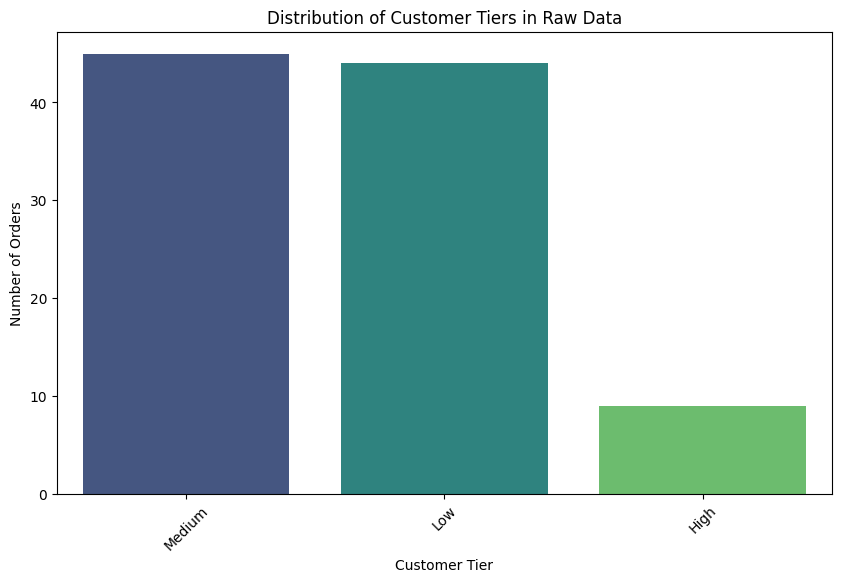

In [174]:
# plotting the distribution of customer tiers for raw_data
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_tier', data=raw_data, order=tier_counts_raw.index, palette='viridis')
plt.title('Distribution of Customer Tiers in Raw Data')
plt.xlabel('Customer Tier')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_2772\3648921676.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_tier', data=incremental_data, order=tier_counts_incremental.index, palette='viridis')


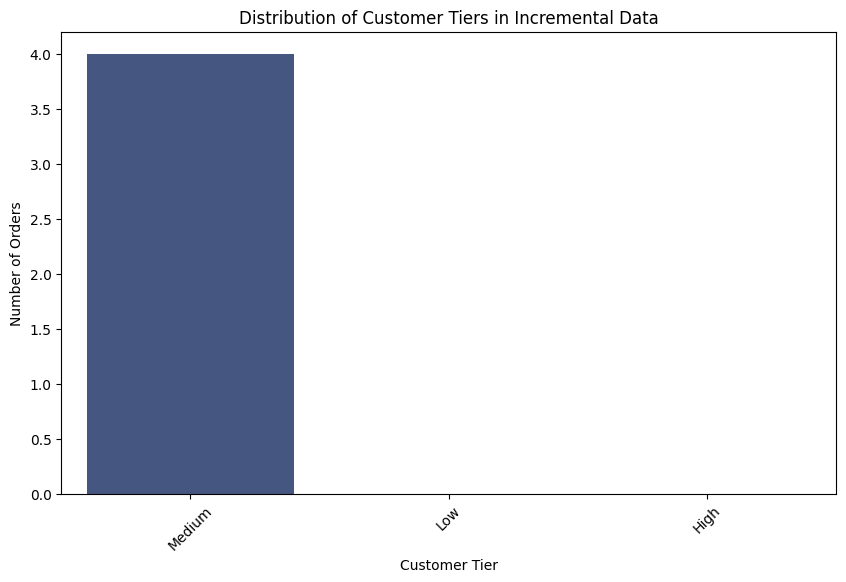

In [175]:
# plotting the distribution of customer tiers for incremental_data
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_tier', data=incremental_data, order=tier_counts_incremental.index, palette='viridis')
plt.title('Distribution of Customer Tiers in Incremental Data')
plt.xlabel('Customer Tier')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45) 
plt.show()


In [176]:
#saving the cleaned data to csv files
raw_data.to_csv('transformed/transformed_full.csv', index=False)
incremental_data.to_csv('transformed/transformed_incremental.csv', index=False)



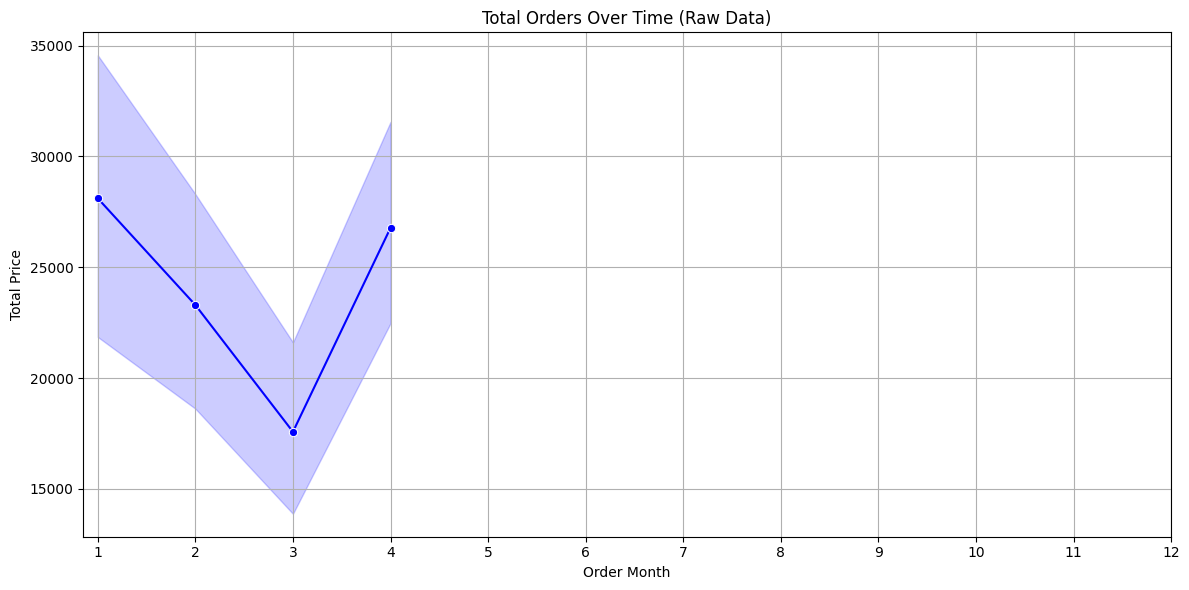

In [177]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=raw_data,
    x='order_month',
    y='total_price',
    estimator='sum',
    marker='o',
    color='blue'
)
plt.title('Total Orders Over Time (Raw Data)')
plt.xlabel('Order Month')
plt.ylabel('Total Price')
plt.xticks(np.arange(1, 13, 1))  # Set x-ticks from Jan (1) to Dec (12)
plt.grid(True)
plt.tight_layout()
plt.show()